In [77]:
import numpy as np
import pandas as pd
import statsmodels.graphics.tsaplots as tsaplots

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from scipy.stats.mstats import winsorize

In [2]:
df = pd.read_hdf('data/joined.h5')
df.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_name_eng,item_category_name,item_category_name_eng,shop_name,shop_name_eng,revenue_day,return
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,ЯВЛЕНИЕ 2012 (BD)-unable to translate,Кино - Blu-Ray,Cinema - Blu-Ray,"Ярославль ТЦ ""Альтаир""","Yaroslavl Shopping center ""Altair""",999.00,False
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,DEEP PURPLE The House Of Blue Light LP,Музыка - Винил,Music - Vinyl,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",899.00,False
2,2013-01-05,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,DEEP PURPLE The House Of Blue Light LP,Музыка - Винил,Music - Vinyl,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",-899.00,True
3,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,DEEP PURPLE Who Do You Think We Are LP,Музыка - Винил,Music - Vinyl,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",1709.05,False
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,DEEP PURPLE 30 Very Best Of 2CD (Фирм.)-unable...,Музыка - CD фирменного производства,Music - CD of branded production,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",1099.00,False


In [3]:
df['item_category_name_short'] = df.item_category_name_eng.apply(lambda x: x.split('-')[0].strip())
df['possible_city'] = df.shop_name_eng.apply(lambda x: x.split(' ')[0].strip())
df.item_category_name_short.unique()

array(['Cinema', 'Music', 'Games', 'PC Games', 'Programs', 'Books',
       'Gifts', 'Accessories', 'Game Consoles', 'Payment cards',
       'Clean media (piece)', 'Clean carriers (spire)', 'Office', 'PC',
       'Elements of a food', 'Delivery of goods', 'Книги',
       'Payment cards (Movies, Music, Games)', 'Tickets (figure)',
       'Android games', 'MAC Games', 'Official', 'Payment Cards'], dtype=object)

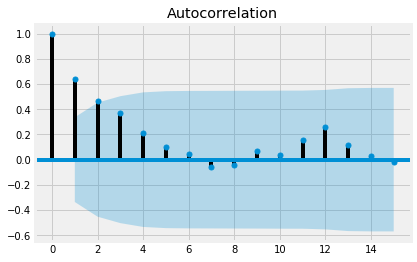

In [4]:
agg = df.groupby(['date_block_num'])['item_cnt_day'].sum().reset_index()
agg.head()
plt.figure(figsize=(20,10))
tsaplots.plot_acf(agg.item_cnt_day, lags=15)
plt.show()

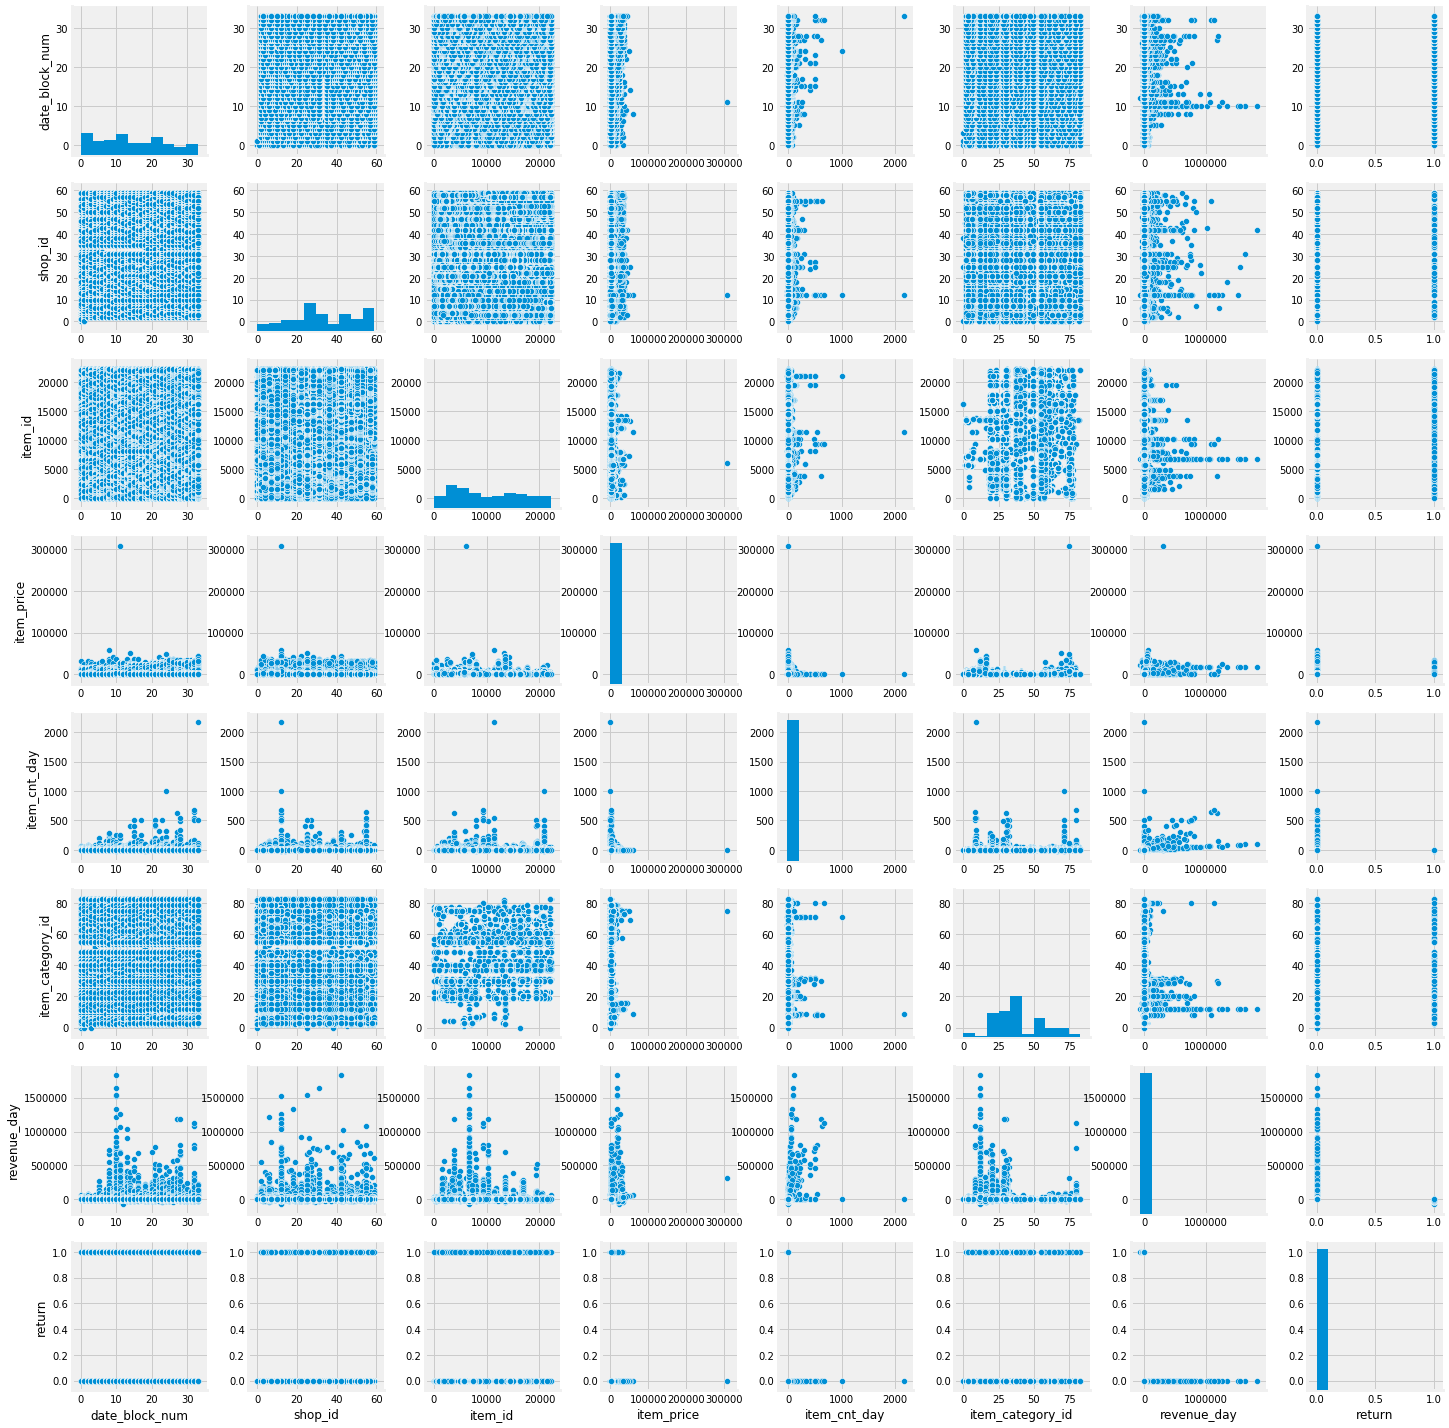

In [20]:
sns.pairplot(df)

In [5]:
le_city = preprocessing.LabelEncoder()
le_cat_short = preprocessing.LabelEncoder()

df['city_id'] = le_city.fit_transform(df.possible_city)
df['category_short_id'] = le_cat_short.fit_transform(df.item_category_name_short)

df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_name_eng,item_category_name,item_category_name_eng,shop_name,shop_name_eng,revenue_day,return,item_category_name_short,possible_city,city_id,category_short_id
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,ЯВЛЕНИЕ 2012 (BD)-unable to translate,Кино - Blu-Ray,Cinema - Blu-Ray,"Ярославль ТЦ ""Альтаир""","Yaroslavl Shopping center ""Altair""",999.00,False,Cinema,Yaroslavl,31,3
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,DEEP PURPLE The House Of Blue Light LP,Музыка - Винил,Music - Vinyl,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",899.00,False,Music,Moscow,10,12
2,2013-01-05,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,DEEP PURPLE The House Of Blue Light LP,Музыка - Винил,Music - Vinyl,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",-899.00,True,Music,Moscow,10,12
3,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,DEEP PURPLE Who Do You Think We Are LP,Музыка - Винил,Music - Vinyl,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",1709.05,False,Music,Moscow,10,12
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,DEEP PURPLE 30 Very Best Of 2CD (Фирм.)-unable...,Музыка - CD фирменного производства,Music - CD of branded production,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",1099.00,False,Music,Moscow,10,12


In [6]:
items = df[['item_id','item_price']].drop_duplicates()
items['item_price_rank'] = pd.qcut(items.item_price,5,labels=False)
df2 = pd.merge(df,
               items[['item_id','item_price_rank']],
               how='left',
               on=['item_id'])
df2['moy'] = pd.DatetimeIndex(df2.date).month
df2['qoy'] = pd.DatetimeIndex(df2.date).quarter
df2.head()
df2.columns.values

array(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'item_name', 'item_category_id', 'item_name_eng',
       'item_category_name', 'item_category_name_eng', 'shop_name',
       'shop_name_eng', 'revenue_day', 'return',
       'item_category_name_short', 'possible_city', 'city_id',
       'category_short_id', 'item_price_rank', 'moy', 'qoy'], dtype=object)

In [10]:
df3 = df2.groupby(['date_block_num','shop_id','item_id']).agg({
    'item_price':'max',
    'item_cnt_day':'sum',
    'item_category_id':'max',
    'city_id':'max',
    'category_short_id':'max',
    'item_price_rank':'max',
    'moy':'max',
    'qoy':'max'
}).reset_index()

In [23]:
returns = df2[df2['return']].groupby(['date_block_num','shop_id','item_id']).agg({
     'item_cnt_day':'sum'
}).reset_index()
returns.columns = ['date_block_num','shop_id','item_id','return_cnt']
df4 = pd.merge(df3,
               returns,
               on = ['date_block_num','shop_id','item_id'],
               how = 'left').fillna(0)


,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,city_id,category_short_id,item_price_rank,moy,qoy,return_cnt
0,0,0,32,221.0,114.0,40,30,3,2,1,1,0.0
63226,1,0,32,221.0,190.0,40,30,3,2,2,1,0.0


In [27]:
shifted = df4[['date_block_num','shop_id','item_id','item_cnt_day','return_cnt']]
shifted['date_block_num'] = shifted.date_block_num + 1
shifted.head()

/home/nick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date_block_num,shop_id,item_id,item_cnt_day,return_cnt
0,1,0,32,114.0,0.0
1,1,0,33,30.0,0.0
2,1,0,35,5.0,0.0
3,1,0,43,5.0,0.0
4,1,0,51,14.0,0.0


In [31]:
df5 = pd.merge(df4,
               shifted,
               suffixes=['','_previous'],
               on = ['date_block_num','shop_id','item_id'],
               how = 'left').fillna(0)
df5[df5.date_block_num==1].head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,city_id,category_short_id,item_price_rank,moy,qoy,return_cnt,item_cnt_day_previous,return_cnt_previous
63224,1,0,30,265.0,837.0,40,30,3,2,2,1,0.0,0.0,0.0
63225,1,0,31,434.0,770.0,37,30,3,3,2,1,0.0,0.0,0.0
63226,1,0,32,221.0,190.0,40,30,3,2,2,1,0.0,114.0,0.0
63227,1,0,33,347.0,30.0,37,30,3,2,2,1,0.0,30.0,0.0
63228,1,0,35,247.0,70.0,40,30,3,2,2,1,0.0,5.0,0.0


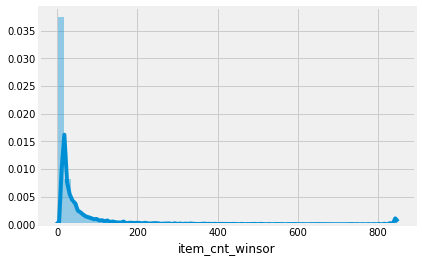

In [123]:
sns.distplot(df5.item_cnt_winsor)

In [112]:
df5['item_cnt_winsor'] = winsorize(df5.item_cnt_day,limits=(.01,.01))

In [113]:
features = ['shop_id','item_id','item_price','item_category_id',
            'city_id','moy','item_cnt_day_previous']
target = ['item_cnt_winsor']

train = df5[ (df5.date_block_num>0) & (df5.date_block_num<33) ]
test = df5[ (df5.date_block_num==33) ]

X_train = train[features].values
y_train = train[target].values.ravel()

X_test = test[features].values
y_test = test[target].values.ravel()

print(X_test,y_test)

[[  2.00000000e+00   3.10000000e+01   3.99000000e+02 ...,   0.00000000e+00
    1.00000000e+01   0.00000000e+00]
 [  2.00000000e+00   4.86000000e+02   3.00000000e+02 ...,   0.00000000e+00
    1.00000000e+01   7.00000000e+00]
 [  2.00000000e+00   7.87000000e+02   4.20000000e+02 ...,   0.00000000e+00
    1.00000000e+01   0.00000000e+00]
 ..., 
 [  5.90000000e+01   2.20910000e+04   1.79000000e+02 ...,   3.10000000e+01
    1.00000000e+01   4.50000000e+01]
 [  5.90000000e+01   2.21000000e+04   6.29000000e+02 ...,   3.10000000e+01
    1.00000000e+01   6.00000000e+00]
 [  5.90000000e+01   2.21020000e+04   1.25000000e+03 ...,   3.10000000e+01
    1.00000000e+01   0.00000000e+00]] [ 70.  21.   3. ...,  15.   6.  23.]


In [114]:
rfr = RandomForestRegressor(oob_score=True)
rfr.fit(X_train,y_train)

/home/nick/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [115]:
print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))

0.953047030361
0.405330429063


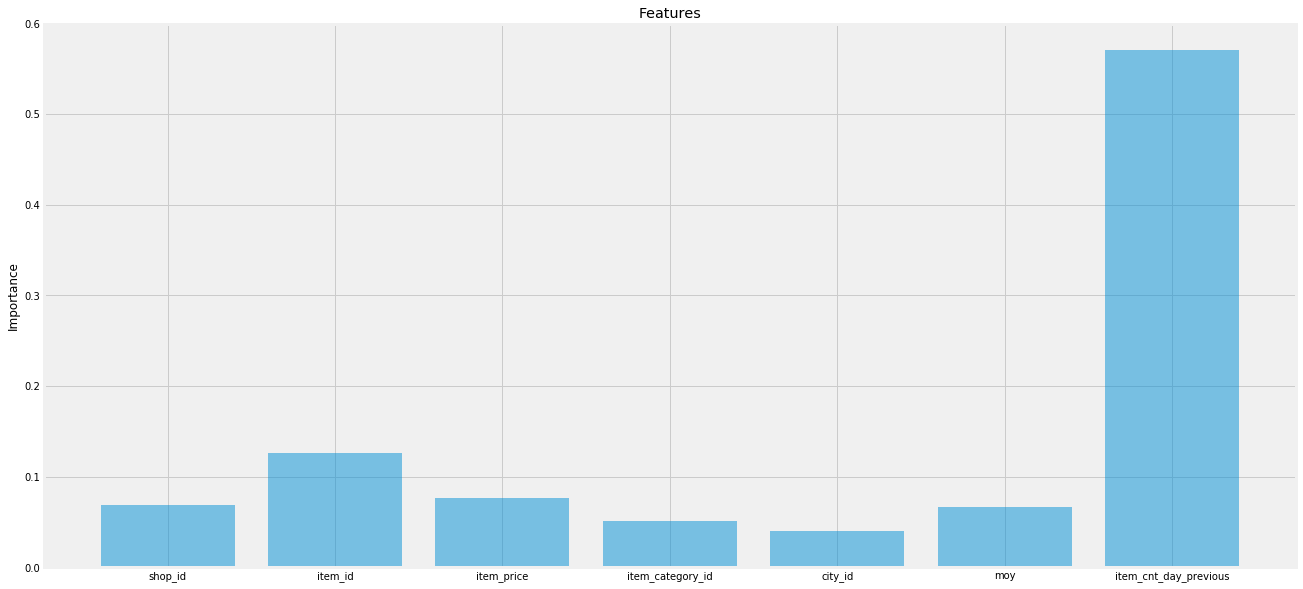

In [117]:
y_pos = np.arange(len(features))
performance = rfr.feature_importances_
plt.figure(figsize=(20,10))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, features)
plt.ylabel('Importance')
plt.title('Features')
 
plt.show()

In [129]:
res_train = pd.DataFrame({
    'y':y_train,
    'ŷ':rfr.predict(X_train)
})

res_test = pd.DataFrame({
    'y':y_test,
    'ŷ':rfr.predict(X_test)
})

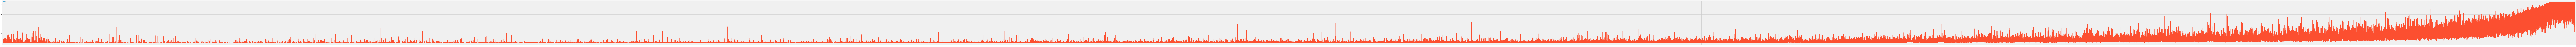

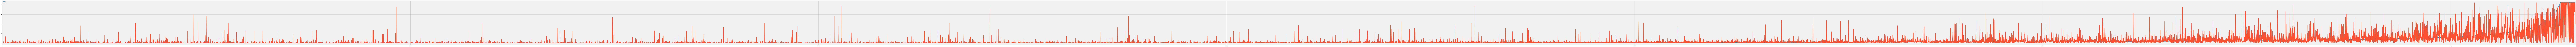

In [132]:
res_train.sort_values('y').reset_index(drop=True).plot(y=['y','ŷ'],figsize=(500,10))
plt.show()
res_test.sort_values('y').reset_index(drop=True).plot(y=['y','ŷ'],figsize=(500,10))
plt.show()